# Preorder Traversal

Preorder traversal explores the tree in a root-left-right manner.

The trajectory followed during preorder traversal can be seen in the figure below.

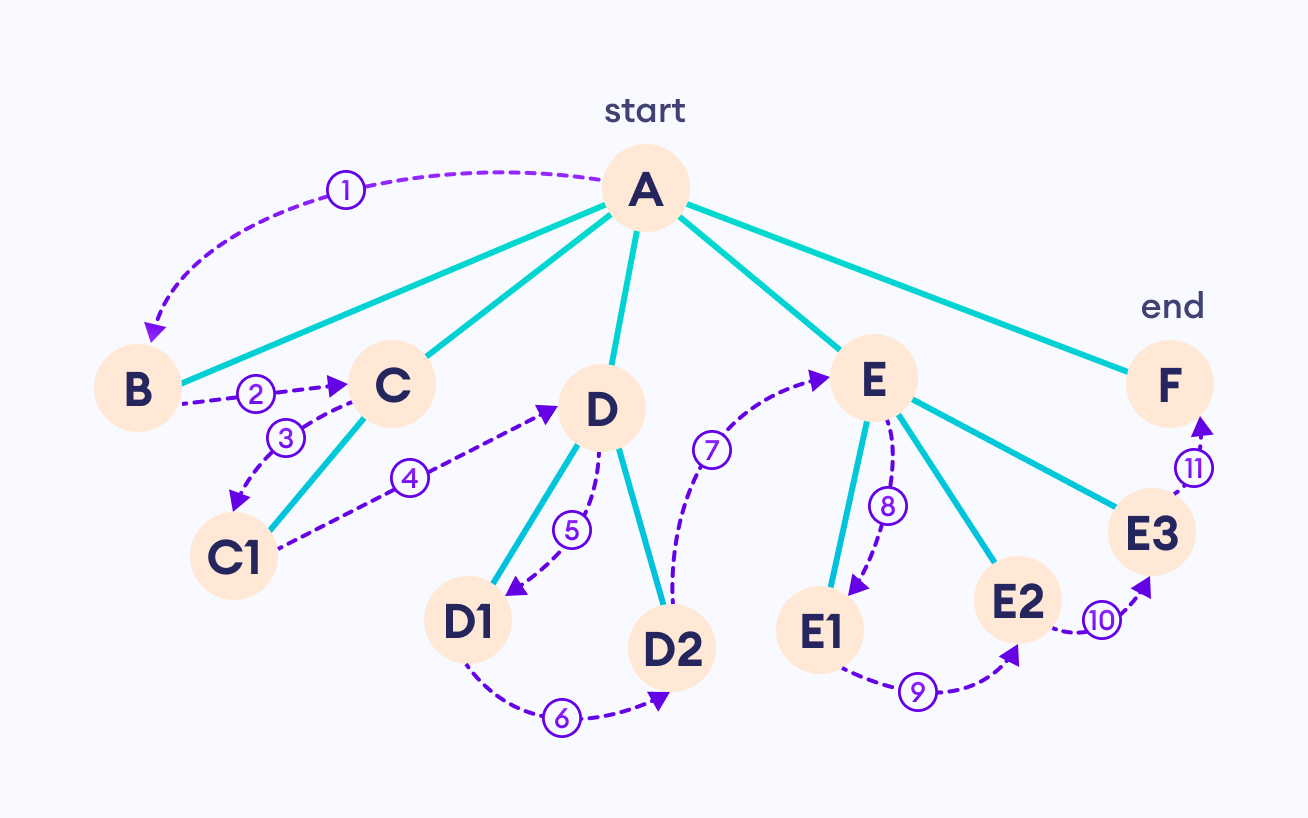

Two things to remember in preorder traversal:

- Traversal takes from left to right.
- If the left child has descendants, you'll explore the left subtree fully before checking out the right one.


In [1]:
class TreeNode:
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, child):
        self.children.append(child)

class Tree:
    def __init__(self, root=None):
        self.root = root

    def preorder_traversal(self, node, traversal=[]):
        if node is None:
            return traversal
        
        traversal.append(node.data)
        for child in node.children:
            self.preorder_traversal(child, traversal)
        
        return traversal

A = TreeNode('A')
B = TreeNode('B')
C = TreeNode('C')
D = TreeNode('D')
E = TreeNode('E')
F = TreeNode('F')
G = TreeNode('G')

A.add_child(B)
A.add_child(C)
A.add_child(D)
B.add_child(E)
B.add_child(F)
E.add_child(G)

general_tree = Tree(A)
print(f' Preorder Traversal: {general_tree.preorder_traversal(general_tree.root)}')

 Preorder Traversal: ['A', 'B', 'E', 'G', 'F', 'C', 'D']


# Postorder Traversal

Postorder traversal explores the tree in a left-right-root manner.

The trajectory followed during postorder traversal can be seen in the figure below.

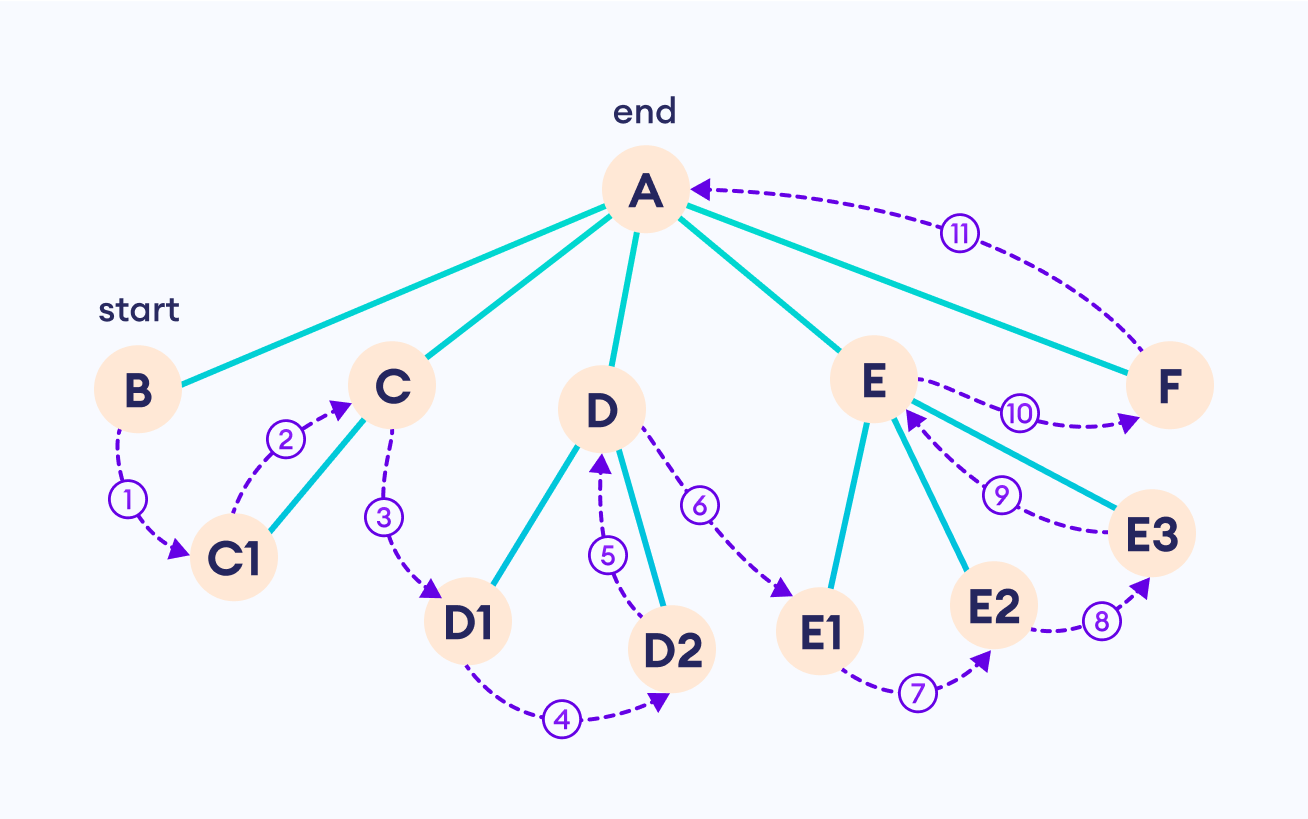

Here, we fully explore each child subtree before visiting the root node.


In [2]:
class TreeNode:
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, child):
        self.children.append(child)

class Tree:
    def __init__(self, root=None):
        self.root = root
        
    def postorder_traversal(self, node, traversal=[]):
        if node is None:
            return traversal
        # first visit the children
        for child in node.children:  
            self.postorder_traversal(child, traversal)
        # then visit the node itself
        traversal.append(node.data)
        return traversal

A = TreeNode('A')
B = TreeNode('B')
C = TreeNode('C')
D = TreeNode('D')
E = TreeNode('E')
F = TreeNode('F')
G = TreeNode('G')

A.add_child(B)
A.add_child(C)
A.add_child(D)
B.add_child(E)
B.add_child(F)
E.add_child(G)

general_tree = Tree(A)
print(f'Postorder Traversal: {general_tree.postorder_traversal(general_tree.root)}')

Postorder Traversal: ['G', 'E', 'F', 'B', 'C', 'D', 'A']


# Breadth First Tree Traversal (Level Order Traversal)

Level order traversal, also known as breadth-first search, visits nodes in a level-by-level manner.

For any general tree, we start from the root, visit all nodes at the current level, and then move to the next level.

Let's clarify this with an example.

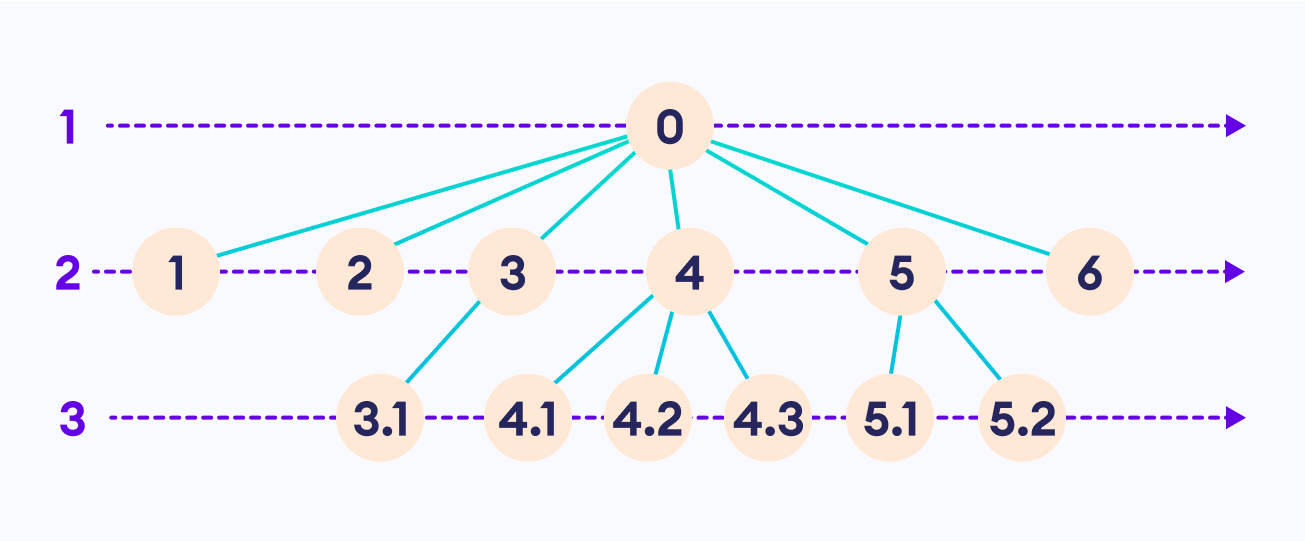

# Real-Life Analogy: Breadth First Traversal

One of the best ways to understand Breadth First Traversal is through the organizational hierarchy.

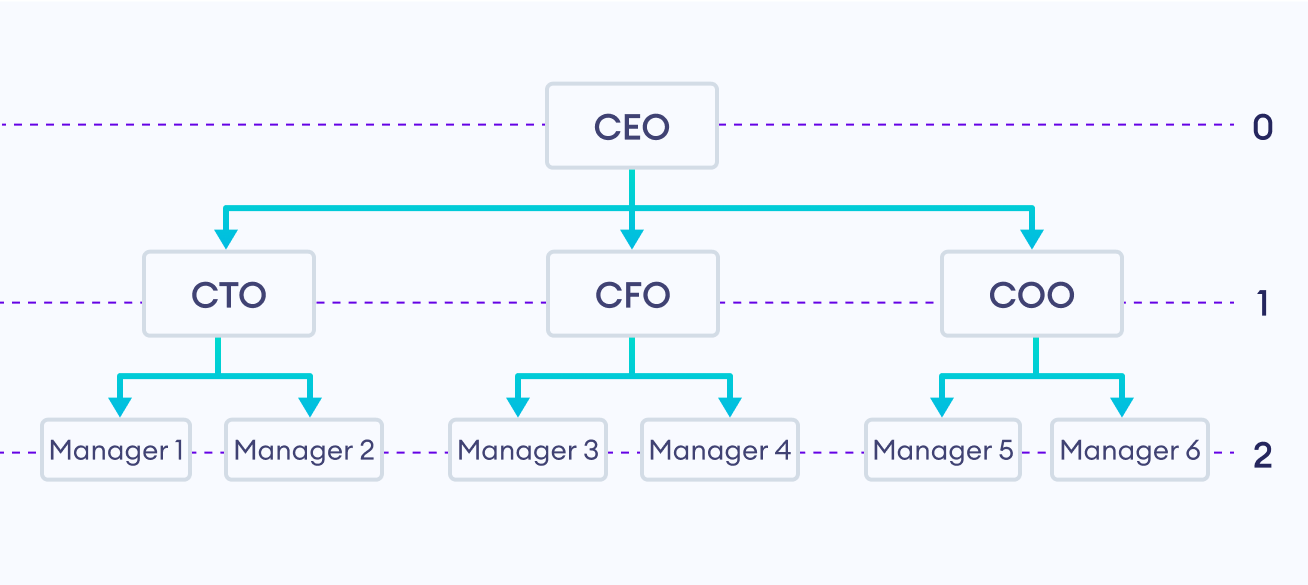

As per our traversal, we see that:

- Level 0: CEO has the highest authority in the organization.
- Level 1: CTO, CFO, and COO all have the same authority and answer directly to the CEO.
- Level 2: The Managers all hold the same degree of authority.


Quá trình tư duy: Duyệt theo chiều rộng Hãy cố gắng liệt kê các bước cơ bản trong việc thực hiện duyệt theo chiều rộng.

Phân rã vấn đề.
Nếu một nút ở cấp độ n, tất cả các nút con của nó sẽ ở cấp độ n+1.

Vì vậy, các bước liên quan đến cách tiếp cận theo chiều rộng là:

Truy cập nút gốc.
Truy cập tất cả các nút con của nút gốc.
Lặp lại cho tất cả các nút con.
Chọn phương pháp.
Ở đây, chúng ta không thể sử dụng đệ quy vì có một hạn chế cần xem xét.

Đệ quy vốn tuân theo mô hình Last-In-First-Out (LIFO). Nếu chúng ta làm như vậy, chúng ta sẽ xử lý các nút con của một nút trước khi truy cập vào các nút anh em của nó.

Để khắc phục hạn chế này, chúng ta cần triển khai một phương pháp để theo dõi các nút cần được truy cập theo thứ tự chính xác.

Vì vậy, chúng ta cần một phương pháp FIFO để giải quyết vấn đề này.

Lựa chọn cấu trúc dữ liệu bổ sung.
Sử dụng Queue để truy cập các nút anh em trước các nút con Hình: Sử dụng Queue để truy cập các nút anh em trước các nút con Queue là cấu trúc dữ liệu lý tưởng cho việc duyệt này.

Quá trình bắt đầu bằng việc truy cập nút gốc và đưa các nút con của nó vào cuối hàng đợi.

Khi mỗi nút được truy cập, các nút con của nó được đưa vào cuối hàng đợi, và nút đó được lấy ra khỏi phía trước của hàng đợi.

Theo cách này, tất cả các nút con được truy cập trước bất kỳ nút cháu nào, như yêu cầu.




In [3]:
from collections import deque

class TreeNode:
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, child):
        self.children.append(child)

class Tree:
    def __init__(self, root=None):
        self.root = root
        
    def breadth_first_traversal(self):
        if not self.root:
            return []

        queue = deque()
        queue.append(self.root)
        
        traversal = [] 

        while queue:
            # we use a queue: FIFO
            current_node = queue.popleft()
            # append the data to the list
            traversal.append(current_node.data)  
    
            for child in current_node.children:
                queue.append(child)
    
        return traversal  

A = TreeNode('A')
B = TreeNode('B')
C = TreeNode('C')
D = TreeNode('D')
E = TreeNode('E')
F = TreeNode('F')
G = TreeNode('G')

A.add_child(B)
A.add_child(C)
A.add_child(D)
B.add_child(E)
B.add_child(F)
E.add_child(G)

general_tree = Tree(A)
print(f'Breadth First Traversal: {general_tree.breadth_first_traversal()}')

Breadth First Traversal: ['A', 'B', 'C', 'D', 'E', 'F', 'G']


# Source Code: Traversal of General Trees

In real life, all the techniques of traversal are equally important when solving practical problems concerning general trees.

So, it makes sense to include all of the methods in a common block of code.

Let's combine our implementations of traversal in a single program and see the result.



In [4]:
from collections import deque

class TreeNode:
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, child):
        self.children.append(child)

class Tree:
    def __init__(self, root=None):
        self.root = root
 
    def preorder_traversal(self, node, traversal=[]):
        if node is None:
            return traversal
        
        traversal.append(node.data)
        for child in node.children:
            self.preorder_traversal(child, traversal)
        
        return traversal
        
    def postorder_traversal(self, node, traversal=[]):
        if node is None:
            return traversal
        for child in node.children:  
            self.postorder_traversal(child, traversal)
        traversal.append(node.data)
        return traversal
        
    def breadth_first_traversal(self):
        if not self.root:
            return []

        queue = deque()
        queue.append(self.root)
        
        traversal = [] 

        while queue:
            current_node = queue.popleft()
            traversal.append(current_node.data)  
    
            for child in current_node.children:
                queue.append(child)
    
        return traversal  

A = TreeNode('A')
B = TreeNode('B')
C = TreeNode('C')
D = TreeNode('D')
E = TreeNode('E')
F = TreeNode('F')
G = TreeNode('G')

A.add_child(B)
A.add_child(C)
A.add_child(D)
B.add_child(E)
B.add_child(F)
E.add_child(G)

general_tree = Tree(A)

print(f'Preorder Traversal: {general_tree.preorder_traversal(general_tree.root)}')
print(f'Postorder Traversal: {general_tree.postorder_traversal(general_tree.root)}')
print(f'Breadth First Traversal: {general_tree.breadth_first_traversal()}')

Preorder Traversal: ['A', 'B', 'E', 'G', 'F', 'C', 'D']
Postorder Traversal: ['G', 'E', 'F', 'B', 'C', 'D', 'A']
Breadth First Traversal: ['A', 'B', 'C', 'D', 'E', 'F', 'G']


This should allow us to perform all of the techniques of traversal through the same program for the following tree..

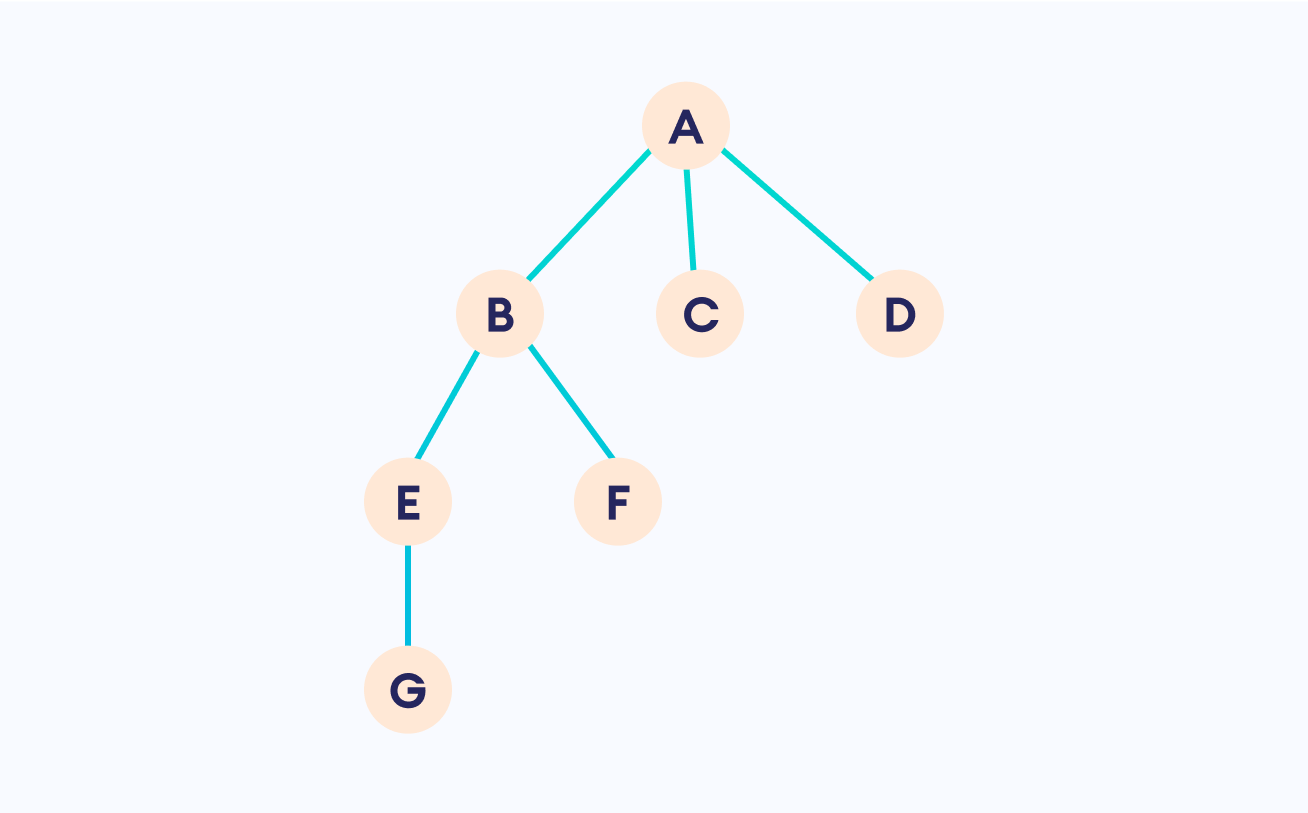